In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
df = pd.read_excel("MDS_Assignment1_winequality.xlsx")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 11].values
X = sm.add_constant(X)

print(X.shape)
print(y.shape)

(1599, 12)
(1599,)


## (a) (10%) Show the results of regression analysis as follows.

In [ ]:

model = sm.OLS(y, X).fit()
summary = model.summary()

estimates = model.params
std_errors = model.bse
t_statistics = model.tvalues
p_values = model.pvalues

results_df = pd.DataFrame({'Estimates': estimates, 'Std. Errors': std_errors, 't-value': t_statistics, 'p-value': p_values})
results_df.index = ['Intercept', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
results_df  

,Estimates,Std. Errors,t-value,p-value
Intercept,21.965208,21.194575,1.036360,3.001921e-01
fixed acidity,0.024991,0.025949,0.963083,3.356528e-01
volatile acidity,-1.083590,0.121101,-8.947802,9.872361e-19
citric acid,-0.182564,0.147176,-1.240445,2.149942e-01
residual sugar,0.016331,0.015002,1.088599,2.764960e-01
chlorides,-1.874225,0.419283,-4.470070,8.373953e-06
free sulfur dioxide,0.004361,0.002171,2.008635,4.474495e-02
total sulfur dioxide,-0.003265,0.000729,-4.479830,8.004610e-06
density,-17.881164,21.633100,-0.826565,4.086079e-01
pH,-0.413653,0.191597,-2.158971,3.100189e-02


In [ ]:
r_squared = model.rsquared
adjusted_r_squared = model.rsquared_adj

print("R-squared (R²):", r_squared)
print("Adjusted R-squared (Adjusted R²):", adjusted_r_squared)

R-squared (R²): 0.3605517030386882
Adjusted R-squared (Adjusted R²): 0.3561194842191706


## (b) (5%) The fitting of the linear regression is a good idea? If yes, why? If no, why? What’s the possible reason of poor fitting?

### Ans: No, it's not a good idea. The reason for poor fitting when using a linear regression model may be that 1-degree linear combination cannot effectively explain the relationship between the dependent variable and the independent variables.

## (c) (5%) Based on the results, rank the independent variables by p-values and which one are statistically significant variables with p-values<0.01? (i.e. 重要變數挑選)

In [ ]:
significance_df = results_df.sort_values(by ="p-value")
significance_df[significance_df["p-value"] < 0.01]


,Estimates,Std. Errors,t-value,p-value
alcohol,0.276198,0.026484,10.429014,1.123029e-24
volatile acidity,-1.083590,0.121101,-8.947802,9.872361e-19
sulphates,0.916334,0.114337,8.014297,2.127228e-15
total sulfur dioxide,-0.003265,0.000729,-4.479830,8.004610e-06
chlorides,-1.874225,0.419283,-4.470070,8.373953e-06


### Ans : 1. alcohol, 2. volatile acidity, 3. total sulfur dioxide, 4. chlorides.

## (d) (15%) Testify the underlying assumptions of regression (1) Normality, (2) Independence, and (3) Homogeneity of Variance with respect to residual.

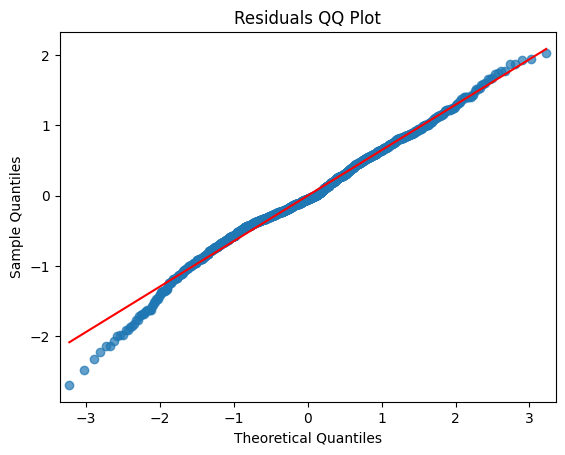

AttributeError: module 'statsmodels.stats.api' has no attribute 'shapiro'

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot

residuals = model.resid

qq = ProbPlot(residuals)
qq.qqplot(line='s', color='C0', alpha=0.7)

plt.title("Residuals QQ Plot")
plt.show()

shapiro_test = sm.stats.shapiro(residuals)
print("Shapiro-Wilk p-value:", shapiro_test[1])